In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

from rur import uri, uhmi

# 1. Load Data

Description: https://gemsimulation.com/#/data/datainfo

In [3]:
Repository = "/storage7/NewCluster" # Where NC data is stored
snap = uri.RamsesSnapshot(Repository, 0, z=0.8)

gals = uhmi.HaloMaker.load(snap, galaxy=True)
print(f"{len(gals)} galaxies found")
print(gals.dtype.names)
print()
hals = uhmi.HaloMaker.load(snap, galaxy=False)
print(f"{len(hals)} halos found")
print(hals.dtype.names)
print()

Find nearest iout=620 for z=0.8
[Output 00620] Age (Gyr) : 6.883 / 13.761, z = 0.80011 (a = 0.5555)
5570 galaxies found
('nparts', 'id', 'timestep', 'level', 'host', 'hostsub', 'nbsub', 'nextsub', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'r', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'sigma_bulge', 'm_bulge', 'rvir', 'mvir', 'tvir', 'cvel', 'rho0', 'rc')

89994 halos found
('nparts', 'id', 'timestep', 'level', 'host', 'hostsub', 'nbsub', 'nextsub', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'r', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'rvir', 'mvir', 'tvir', 'cvel', 'rho0', 'rc')



## Extended values

In [5]:
gals = uhmi.HaloMaker.load(snap, galaxy=True, extend=True)
print(f"{len(gals)} galaxies found")
print(gals.dtype.names)
print()
hals = uhmi.HaloMaker.load(snap, galaxy=False, extend=True)
print(f"{len(hals)} halos found")
print(hals.dtype.names)
print()

5570 galaxies found
('nparts', 'id', 'timestep', 'level', 'host', 'hostsub', 'nbsub', 'nextsub', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'r', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'sigma_bulge', 'm_bulge', 'rvir', 'mvir', 'tvir', 'cvel', 'rho0', 'rc', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'r50', 'r90', 'r50u', 'r50g', 'r50r', 'r50i', 'r50z', 'r90u', 'r90g', 'r90r', 'r90i', 'r90z', 'SFR', 'SFR_r50', 'SFR_r90', 'SFR10', 'SFR10_r50', 'SFR10_r90', 'age', 'ageu', 'ageg', 'ager', 'agei', 'agez', 'vsig', 'vsig_r50', 'vsig_r90', 'metal', 'vsig_gas', 'metal_gas', 'vsig_gas_r50', 'vsig_gas_r90', 'M_gas', 'M_gas_r50', 'M_gas_r90', 'Mcold_gas', 'Mcold_gas_r50', 'Mcold_gas_r90', 'Mdense_gas', 'Mdense_gas_r50', 'Mdense_gas_r90', 'H_gas', 'O_gas', 'Fe_gas', 'Mg_gas', 'C_gas', 'N_gas', 'Si_gas', 'S_gas', 'D_gas', 'CDustSmall_gas', 'CDustLarge_gas', 'SiDustSmall_gas', 'SiDustLarge_gas', 'SBu', 'SBu_r50', 'SBu_r90', 'SBg', 'SBg_r50', 'SBg_r90', 'SBr', 'SBr_r50', 'SB

# 2. Host and Sub

In [14]:
sample_host = gals[0]
print(f"ID={sample_host['id']}")
print(f"Level={sample_host['level']}")
print(f"nbsub={sample_host['nbsub']}")
subs = gals[(gals['host'] == sample_host['id']) & (gals['level'] > 1)]
for sub in subs:
    print(f"  ID={sub['id']} Level={sub['level']} Host={sub['host']}")


ID=1
Level=1
nbsub=9
  ID=2983 Level=2 Host=1
  ID=2984 Level=2 Host=1
  ID=2985 Level=2 Host=1
  ID=2986 Level=2 Host=1
  ID=2987 Level=2 Host=1
  ID=2988 Level=2 Host=1
  ID=2989 Level=2 Host=1
  ID=2990 Level=2 Host=1
  ID=2991 Level=2 Host=1


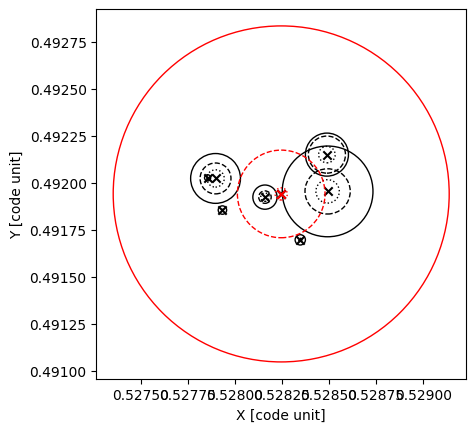

In [25]:
fig, ax = plt.subplots()
ax.scatter(sample_host['x'], sample_host['y'], color='r', marker='x', zorder=2)
circle = plt.Circle((sample_host['x'], sample_host['y']), sample_host['r'], color='r', fill=False, zorder=1)
ax.add_patch(circle)
circle = plt.Circle((sample_host['x'], sample_host['y']), sample_host['r90'], color='r', fill=False, zorder=1, ls='--')
ax.add_patch(circle)
circle = plt.Circle((sample_host['x'], sample_host['y']), sample_host['r50'], color='r', fill=False, zorder=1, ls=':')
ax.add_patch(circle)

ax.scatter(subs['x'], subs['y'], color='k', marker='x', zorder=0)
for sub in subs:
    circle = plt.Circle((sub['x'], sub['y']), sub['r'], color='k', fill=False, zorder=0)
    ax.add_patch(circle)
    circle = plt.Circle((sub['x'], sub['y']), sub['r90'], color='k', fill=False, zorder=0, ls='--')
    ax.add_patch(circle)
    circle = plt.Circle((sub['x'], sub['y']), sub['r50'], color='k', fill=False, zorder=0, ls=':')
    ax.add_patch(circle)


ax.set_aspect('equal')
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Y [code unit]")
plt.show(); plt.close()

# 3. Contaminated Halo

As NC is "zoom-in" simulation, the masses of DM particles can be different.  
Some halos can have poor-resolution DM particles, which is called "contaminated".


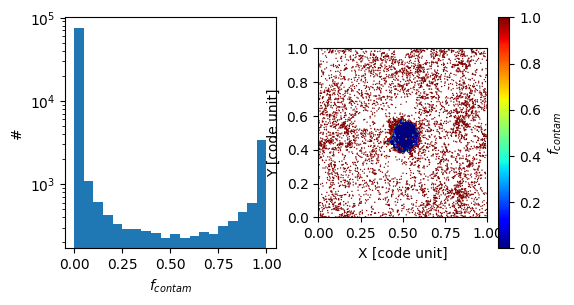

In [34]:
# We can assume contaminated-mass using nparts
mindm = np.min(hals['m']/hals['nparts']) # Minimum mass of one DM particle
mcontam = hals['m'] - hals['nparts']*mindm
f_contam = mcontam / hals['m']

# Or, if extended data is loaded, the following will work
f_contam = hals['mcontam'] / hals['m']



fig, axes = plt.subplots(1, 2, figsize=(6,3))

ax = axes[0]
ax.hist(f_contam, bins=np.linspace(0, 1, 21))
ax.set_yscale('log')
ax.set_ylabel("#")
ax.set_xlabel(r"$f_{contam}$")

ax = axes[1]
sc = ax.scatter(hals['x'], hals['y'], c=f_contam, s=1, ec='none', cmap=plt.cm.jet)
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_xlabel("X [code unit]")
ax.set_ylim(0,1)
ax.set_ylabel("Y [code unit]")
plt.colorbar(sc, ax=ax, label=r"$f_{contam}$")
plt.show(); plt.close()



# 4. Member particles

## A) 1 Target

### Galaxy

Galaxy ID=99 has 1748369 star particles
('id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'epoch', 'metal')


/tmp/ipykernel_1866876/4086666459.py:14: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
/tmp/ipykernel_1866876/4086666459.py:20: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ze[0], ze[-1]), origin='lower', cmap=plt.cm.Greys)


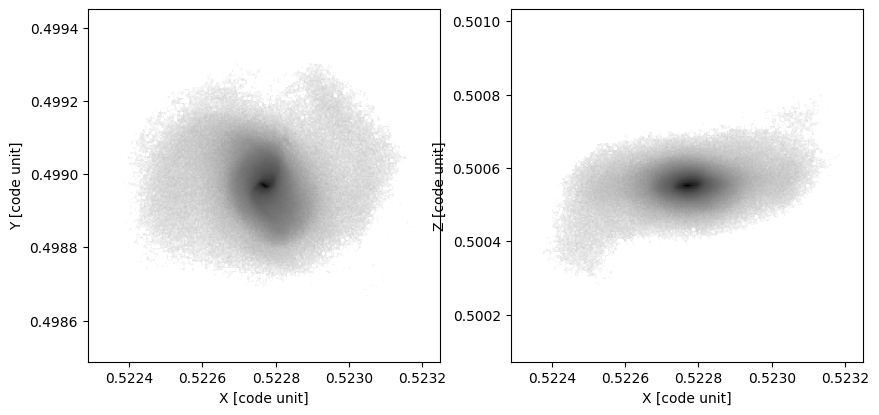

In [41]:
# Choose random galaxy
sample_galaxy = np.random.choice(gals[gals['m'] > 1e10])
member_star = uhmi.HaloMaker.read_member_part(snap, sample_galaxy['id'], galaxy=True)
print(f"Galaxy ID={sample_galaxy['id']} has {len(member_star)} star particles")
print(member_star.dtype.names)

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
xbins = np.linspace(sample_galaxy['x']-sample_galaxy['r'], sample_galaxy['x']+sample_galaxy['r'], 240)
ybins = np.linspace(sample_galaxy['y']-sample_galaxy['r'], sample_galaxy['y']+sample_galaxy['r'], 240)
zbins = np.linspace(sample_galaxy['z']-sample_galaxy['r'], sample_galaxy['z']+sample_galaxy['r'], 240)
# X-Y projection
ax = axes[0]
hist, xe, ye = np.histogram2d(member_star['x'], member_star['y'], bins=(xbins, ybins), weights=member_star['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Y [code unit]")
# X-Z projection
ax = axes[1]
hist, xe, ze = np.histogram2d(member_star['x'], member_star['z'], bins=(xbins, zbins), weights=member_star['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ze[0], ze[-1]), origin='lower', cmap=plt.cm.Greys)
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Z [code unit]")

plt.show(); plt.close()

### Halo

Galaxy ID=25921 has 919115 star particles
('id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'm')


/tmp/ipykernel_1866876/2049130456.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
/tmp/ipykernel_1866876/2049130456.py:21: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ze[0], ze[-1]), origin='lower', cmap=plt.cm.Greys)


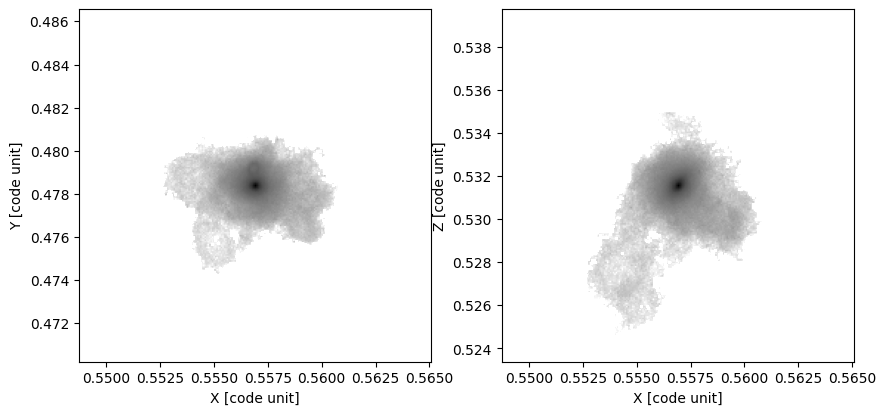

In [42]:
# Choose random halo
pure_hals = hals[f_contam < 0.01]
sample_halo = np.random.choice(pure_hals[pure_hals['mvir'] > 1e12])
member_dm = uhmi.HaloMaker.read_member_part(snap, sample_halo['id'], galaxy=False)
print(f"Galaxy ID={sample_halo['id']} has {len(member_dm)} star particles")
print(member_dm.dtype.names)

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
xbins = np.linspace(sample_halo['x']-sample_halo['r'], sample_halo['x']+sample_halo['r'], 240)
ybins = np.linspace(sample_halo['y']-sample_halo['r'], sample_halo['y']+sample_halo['r'], 240)
zbins = np.linspace(sample_halo['z']-sample_halo['r'], sample_halo['z']+sample_halo['r'], 240)
# X-Y projection
ax = axes[0]
hist, xe, ye = np.histogram2d(member_dm['x'], member_dm['y'], bins=(xbins, ybins), weights=member_dm['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Y [code unit]")
# X-Z projection
ax = axes[1]
hist, xe, ze = np.histogram2d(member_dm['x'], member_dm['z'], bins=(xbins, zbins), weights=member_dm['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ze[0], ze[-1]), origin='lower', cmap=plt.cm.Greys)
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Z [code unit]")

plt.show(); plt.close()

### Coordinate rotation

In [46]:
from rur.sci.geometry import align_to_vector

# Star's position relative to the galaxy's center
original_position = np.vstack((member_star['x']-sample_galaxy['x'], member_star['y']-sample_galaxy['y'], member_star['z']-sample_galaxy['z'])).T
# Galaxy's angular momentum
angular_momentum = np.array([sample_galaxy['Lx'], sample_galaxy['Ly'], sample_galaxy['Lz']])
# New position
aligned_position = align_to_vector(original_position, angular_momentum)

/tmp/ipykernel_1866876/1824231686.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
/tmp/ipykernel_1866876/1824231686.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ze[0], ze[-1]), origin='lower', cmap=plt.cm.Greys)


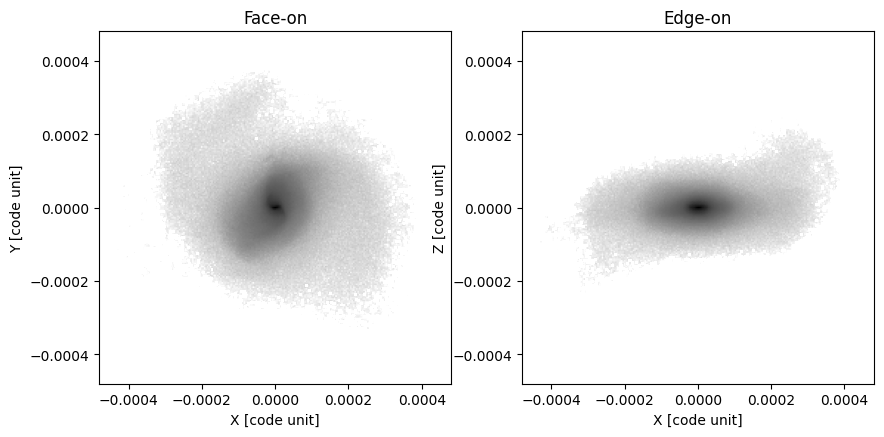

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
xbins = np.linspace(-sample_galaxy['r'], +sample_galaxy['r'], 240)
ybins = np.linspace(-sample_galaxy['r'], +sample_galaxy['r'], 240)
zbins = np.linspace(-sample_galaxy['r'], +sample_galaxy['r'], 240)
# X-Y projection
ax = axes[0]
hist, xe, ye = np.histogram2d(aligned_position[:,0], aligned_position[:,1], bins=(xbins, ybins), weights=member_star['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
ax.set_title("Face-on")
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Y [code unit]")
# X-Z projection
ax = axes[1]
hist, xe, ze = np.histogram2d(aligned_position[:,0], aligned_position[:,2], bins=(xbins, zbins), weights=member_star['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ze[0], ze[-1]), origin='lower', cmap=plt.cm.Greys)
ax.set_title("Edge-on")
ax.set_xlabel("X [code unit]")
ax.set_ylabel("Z [code unit]")

plt.show(); plt.close()

## B) Multi targets

In [52]:
sample_host = gals[0]
subs = gals[(gals['host'] == sample_host['id']) & (gals['level'] > 1)]
alls = np.hstack((sample_host, subs))
print(alls['nparts'])
member_stars = uhmi.HaloMaker.read_member_parts(snap, alls, galaxy=True, copy=True, nthread=8)
print(len(member_stars))

[4921245     302     237     135     228    5160     394   11921     415
     401]


Reading members:   0%|          | 0/10 [00:00<?, ?it/s]

4940438


In [54]:
print(member_stars.dtype.names)

('id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'hmid', 'epoch', 'metal')


/tmp/ipykernel_1866876/3704279876.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
/tmp/ipykernel_1866876/3704279876.py:14: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)
/tmp/ipykernel_1866876/3704279876.py:20: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)


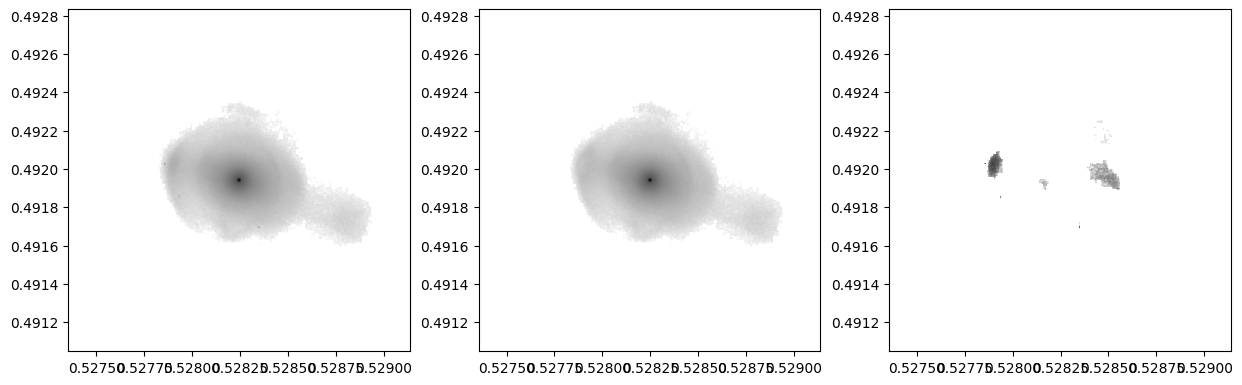

In [57]:
xbins = np.linspace(sample_host['x']-sample_host['r'], sample_host['x']+sample_host['r'], 240)
ybins = np.linspace(sample_host['y']-sample_host['r'], sample_host['y']+sample_host['r'], 240)
fig, axes = plt.subplots(ncols=3, figsize=(15,5))

# All members
ax = axes[0]
hist, xe, ye = np.histogram2d(member_stars['x'], member_stars['y'], bins=(xbins, ybins), weights=member_stars['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)

# Host members
ax = axes[1]
member_of_host = member_stars[member_stars['hmid'] == sample_host['id']]
hist, xe, ye = np.histogram2d(member_of_host['x'], member_of_host['y'], bins=(xbins, ybins), weights=member_of_host['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)

# Subs members
ax = axes[2]
member_of_subs = member_stars[member_stars['hmid'] != sample_host['id']]
hist, xe, ye = np.histogram2d(member_of_subs['x'], member_of_subs['y'], bins=(xbins, ybins), weights=member_of_subs['m'])
ax.imshow(np.log10(hist.T), extent=(xe[0], xe[-1], ye[0], ye[-1]), origin='lower', cmap=plt.cm.Greys)

plt.show(); plt.close()